In [26]:
import numpy as np 
import pandas as pd
import re
import string
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import PyPDF2
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import PyPDF2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from googletrans import Translator, LANGUAGES
import spacy
from spacy.pipeline import EntityRuler
from spacy.lang.en import English
from spacy.tokens import Doc
from spacy import displacy


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dobal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


       Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab... Axes(0.125,0.11;0.775x0.77)


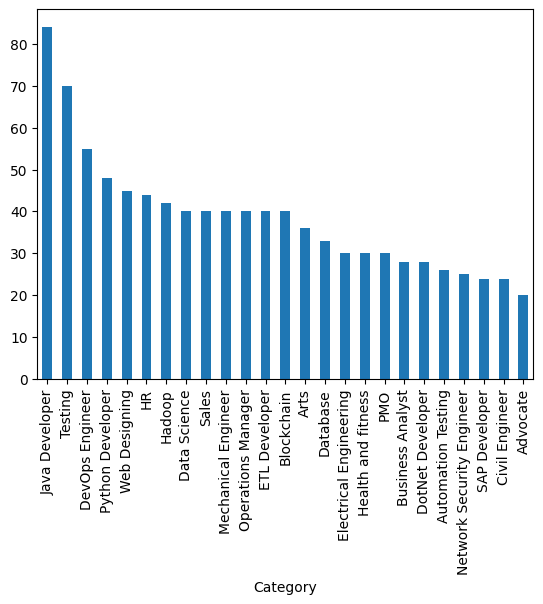

In [27]:
def read_pdf(file_path):
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ''
        for page_num in range(len(reader.pages)):
            text += reader.pages[page_num].extract_text()
        return text

translator = Translator()

def traduire_texte(text, lang = 'fr'):
    try: 
        return translator.translate(text, dest=lang).text
    except:
        return  f"Erreur de traduction:"

data = pd.read_csv("Resume1.csv")
print(data.head(), data['Category'].value_counts(sort=True).nlargest(25).plot.bar())

In [28]:
del_words = ['name', 'city', 'state', 'country', 'fullname', 'company', 'resume', 'curriculum vitae', 'address', 'phone',
             'email', 'linkedin', 'profile', 'summary', 'objective', 'experience', 'education', 'skill', 'skills',
             'reference', 'references', 'contact', 'detail', 'details', 'mail', 'gmail', 'yahoo', 'hotmail', 'mailing',
             'linkedin', 'twitter', 'facebook', 'instagram', 'website', 'web', 'url', 'www', 'year']

def clean_text(text):
    if isinstance(text, list):
        text = ' '.join(text)

    text = text.lower()
    text = ''.join([word for word in text if not word.isdigit()])
    text = re.sub('http\S+\s*', ' ', text)
    text = re.sub('RT|cc', ' ', text)
    text = re.sub('#\S+', '', text)
    text = re.sub('@\S+', '  ', text)
    text = "".join([word for word in text if word not in string.punctuation])
    text = re.sub("\W", " ", str(text))
    text = [word for word in text.split() if word not in stopwords and word not in del_words]
    text = ' '.join(text)
    text = re.sub(r'[^\x00-\x7f]',r' ', text)
    text = re.sub('\s+', ' ', text)
    return text
data['cleaned_text'] = data['Resume'].apply(lambda x: clean_text(x))
data["Numéro de Catégorie"] = LabelEncoder().fit_transform(data["Category"])

<>:12: SyntaxWarning: invalid escape sequence '\S'
<>:14: SyntaxWarning: invalid escape sequence '\S'
<>:15: SyntaxWarning: invalid escape sequence '\S'
<>:17: SyntaxWarning: invalid escape sequence '\W'
<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\S'
<>:14: SyntaxWarning: invalid escape sequence '\S'
<>:15: SyntaxWarning: invalid escape sequence '\S'
<>:17: SyntaxWarning: invalid escape sequence '\W'
<>:21: SyntaxWarning: invalid escape sequence '\s'
C:\Users\dobal\AppData\Local\Temp\ipykernel_1792\458397263.py:12: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('http\S+\s*', ' ', text)
C:\Users\dobal\AppData\Local\Temp\ipykernel_1792\458397263.py:14: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('#\S+', '', text)
C:\Users\dobal\AppData\Local\Temp\ipykernel_1792\458397263.py:15: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('@\S+', '  ', text)
C:\Users\dobal\AppData\Local\Temp\ipykernel_1792\

In [29]:
df_unique = data.drop_duplicates(subset=['Category', 'Numéro de Catégorie'])
df_sorted = df_unique.sort_values(by='Category')
df_sorted

,Category,Resume,cleaned_text,Numéro de Catégorie
84,Advocate,"TECHNICAL QUALIFICATIONS: â¢ Windows, Ms. Off...",technical qualifications windows ms officeeduc...,0
104,Arts,â¢ Good communication skill â¢ Quick learner...,good communication quick learner keen find so...,1
455,Automation Testing,* Excellent grasping power in learning new con...,excellent grasping power learning new concepts...,2
852,Blockchain,Hobbies â¢ Playing Chess â¢ Solving Rubik's ...,hobbies playing chess solving rubiks cube watc...,3
403,Business Analyst,Education Details \r\n BE Computer Science Mum...,computer science mumbai maharashtra mumbai uni...,4
295,Civil Engineer,Education Details \r\n B.E in Civil Engineerin...,civil engineering civil engineering chennai ta...,5
0,Data Science,Skills * Programming Languages: Python (pandas...,programming languages python pandas numpy scip...,6
709,Database,TECHNICAL EXPERTISE â¢ DB Languages: SQL â¢ ...,technical expertise db languages sql database ...,7
599,DevOps Engineer,Skills VISA B1-VISA (USA) Onsite Visits to Swe...,visa bvisa usa onsite visits sweden us seattle...,8
824,DotNet Developer,TECHNICAL SKILLS â¢ Web Technologies: ASP .NE...,technical technologies asp net html css jquery...,9


In [30]:
def balance_dataframe(df, target_count=20):
    balanced_dfs = []  
    
    for category in df['Category'].unique():
        category_df = df[df['Category'] == category]
        
        if len(category_df) > target_count:
            category_df = category_df.sample(n=target_count, random_state=1)
        
        balanced_dfs.append(category_df)
    balanced_df = pd.concat(balanced_dfs, ignore_index=True)
    
    return balanced_df
df_test = balance_dataframe(data)

In [31]:
X_train, X_test, y_train, y_test = [], [], [], []

for category in df_test['Numéro de Catégorie'].unique():
    category_subset = df_test[df_test['Numéro de Catégorie'] == category]

    X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(
        category_subset['cleaned_text'], 
        category_subset['Numéro de Catégorie'], 
        test_size=0.8, 
        random_state=42 
    )


    X_train.extend(X_train_subset)
    X_test.extend(X_test_subset)
    y_train.extend(y_train_subset)
    y_test.extend(y_test_subset)


X_train = pd.Series(X_train)
X_test = pd.Series(X_test)
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


X = X_test_tfidf  
y = y_test  
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X)

In [32]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Précision: {accuracy}")
print(classification_report(y_test, y_pred))



Précision: 0.8925
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.62      0.77        16
           2       0.52      1.00      0.68        16
           3       1.00      1.00      1.00        16
           4       1.00      0.69      0.81        16
           5       1.00      1.00      1.00        16
           6       0.73      1.00      0.84        16
           7       1.00      1.00      1.00        16
           8       0.68      0.94      0.79        16
           9       0.80      1.00      0.89        16
          10       1.00      1.00      1.00        16
          11       1.00      1.00      1.00        16
          12       1.00      0.88      0.93        16
          13       1.00      1.00      1.00        16
          14       1.00      1.00      1.00        16
          15       1.00      1.00      1.00        16
          16       1.00      0.81      0.90        16
         

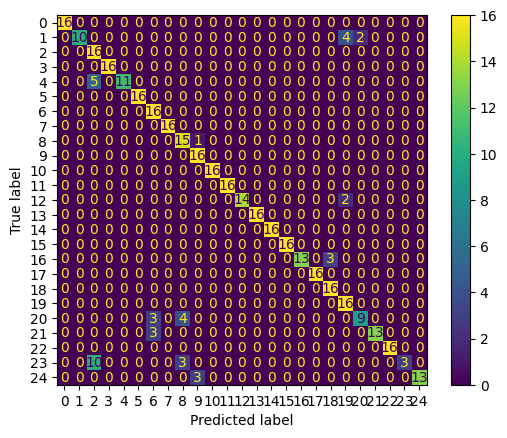

La catégorie 0 n'est pas confondue avec d'autres.
La catégorie 1 est le plus souvent confondue avec 19.
La catégorie 2 n'est pas confondue avec d'autres.
La catégorie 3 n'est pas confondue avec d'autres.
La catégorie 4 est le plus souvent confondue avec 2.
La catégorie 5 n'est pas confondue avec d'autres.
La catégorie 6 n'est pas confondue avec d'autres.
La catégorie 7 n'est pas confondue avec d'autres.
La catégorie 8 est le plus souvent confondue avec 9.
La catégorie 9 n'est pas confondue avec d'autres.
La catégorie 10 n'est pas confondue avec d'autres.
La catégorie 11 n'est pas confondue avec d'autres.
La catégorie 12 est le plus souvent confondue avec 19.
La catégorie 13 n'est pas confondue avec d'autres.
La catégorie 14 n'est pas confondue avec d'autres.
La catégorie 15 n'est pas confondue avec d'autres.
La catégorie 16 est le plus souvent confondue avec 18.
La catégorie 17 n'est pas confondue avec d'autres.
La catégorie 18 n'est pas confondue avec d'autres.
La catégorie 19 n'est p

In [33]:
ConfusionMatrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(ConfusionMatrix).plot()
plt.show()
np.fill_diagonal(ConfusionMatrix, 0)
most_confused_indices = np.argmax(ConfusionMatrix, axis=1)
parties = sorted(set(y_test))
for party, confused_party_index in zip(parties, most_confused_indices):
    if ConfusionMatrix[party, confused_party_index] == 0:
        print(f"La catégorie {party} n'est pas confondue avec d'autres.")
    else:
        confused_party = parties[confused_party_index]
        print(f"La catégorie {party} est le plus souvent confondue avec {confused_party}.")

In [34]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2)


k_values = range(1, 11)  
results = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_kNN = knn.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred_kNN)
    report = classification_report(y_val, y_pred_kNN, zero_division=0)
    results.append((k, accuracy, report))


for k, accuracy, report in results:
    print(f"Résultats pour k={k}:")
    print(f"Précision: {accuracy}")
    



Résultats pour k=1:
Précision: 0.875
Résultats pour k=2:
Précision: 0.6
Résultats pour k=3:
Précision: 0.575
Résultats pour k=4:
Précision: 0.3125
Résultats pour k=5:
Précision: 0.325
Résultats pour k=6:
Précision: 0.3375
Résultats pour k=7:
Précision: 0.3125
Résultats pour k=8:
Précision: 0.2
Résultats pour k=9:
Précision: 0.15
Résultats pour k=10:
Précision: 0.1125


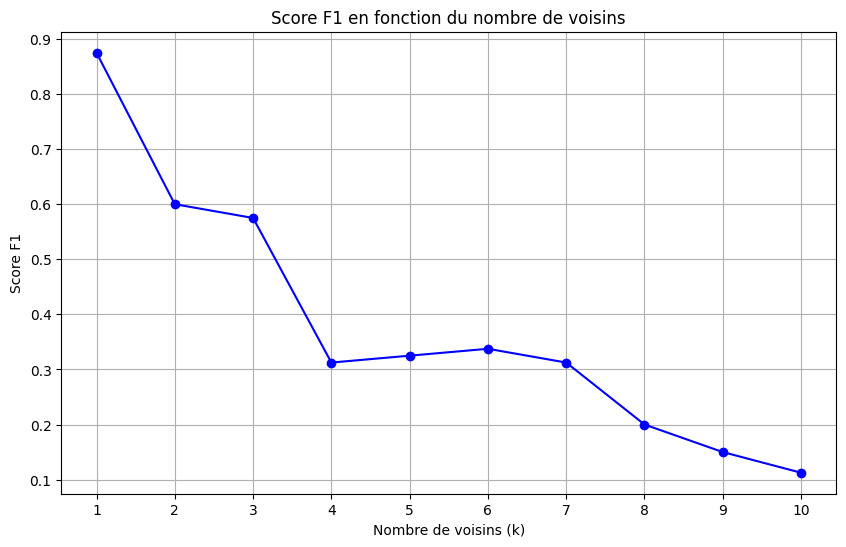

In [35]:
f1_scores = []
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    score = accuracy_score(y_val, y_pred)  
    f1_scores.append(score)

# Tracer le graphique
plt.figure(figsize=(10, 6))
plt.plot(k_values, f1_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Score F1')
plt.title('Score F1 en fonction du nombre de voisins')
plt.xticks(k_values)
plt.grid(True)
plt.show()

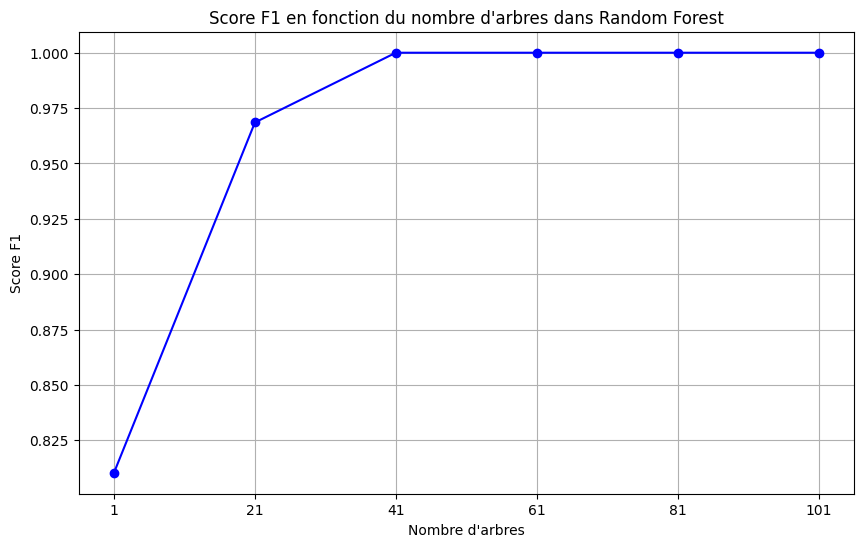

In [36]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2)


tree_counts = range(1, 102, 20)  
f1_scores = []

for n_trees in tree_counts:
    clf = RandomForestClassifier(n_estimators=n_trees)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    score = f1_score(y_val, y_pred, average='macro')
    f1_scores.append(score)

# Tracer le graphique
plt.figure(figsize=(10, 6))
plt.plot(tree_counts, f1_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Nombre d\'arbres')
plt.ylabel('Score F1')
plt.title('Score F1 en fonction du nombre d\'arbres dans Random Forest')
plt.xticks(tree_counts)
plt.grid(True)
plt.show()

In [37]:
X_train, X_test, y_train, y_test = [], [], [], []

for category in df_test['Numéro de Catégorie'].unique():
    category_subset = df_test[df_test['Numéro de Catégorie'] == category]

    X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(
        category_subset['cleaned_text'], 
        category_subset['Numéro de Catégorie'], 
        test_size=0.8, 
        random_state=42 
    )

    X_train.extend(X_train_subset)
    X_test.extend(X_test_subset)
    y_train.extend(y_train_subset)
    y_test.extend(y_test_subset)

X_train = pd.Series(X_train)
X_test = pd.Series(X_test)
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

rf_model = RandomForestClassifier(n_estimators=91)
rf_model.fit(X_train_tfidf, y_train)

y_pred_rf = rf_model.predict(X_test_tfidf)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Précision: {accuracy_rf}")
print(classification_report(y_test, y_pred_rf))


Précision: 0.7775
              precision    recall  f1-score   support

           0       1.00      0.62      0.77        16
           1       1.00      0.75      0.86        16
           2       0.57      0.75      0.65        16
           3       1.00      1.00      1.00        16
           4       0.48      0.69      0.56        16
           5       1.00      0.62      0.77        16
           6       1.00      0.50      0.67        16
           7       0.76      1.00      0.86        16
           8       1.00      0.94      0.97        16
           9       0.67      1.00      0.80        16
          10       0.84      1.00      0.91        16
          11       0.61      0.69      0.65        16
          12       0.36      1.00      0.53        16
          13       1.00      1.00      1.00        16
          14       1.00      0.69      0.81        16
          15       1.00      0.75      0.86        16
          16       0.87      0.81      0.84        16
         

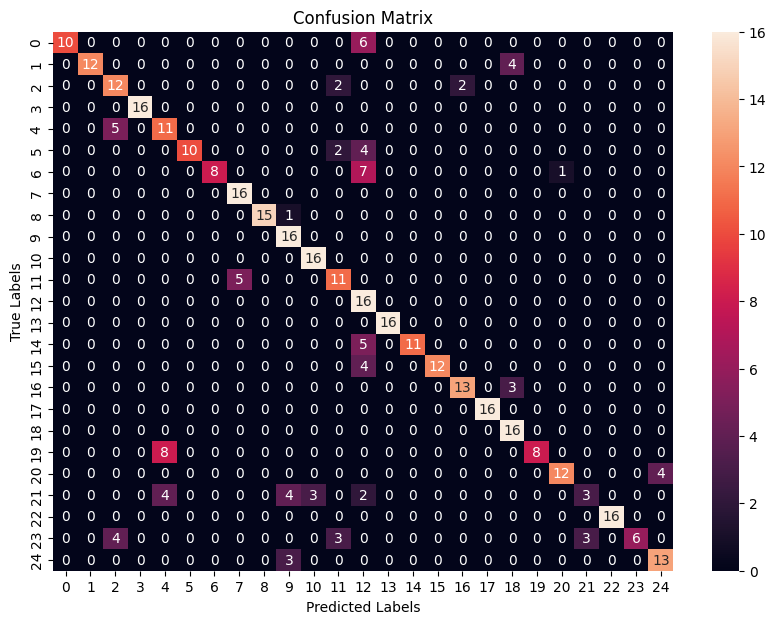

In [38]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [39]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2)


C_values = [0.01, 0.2, 0.4, 0.6, 0.8, 1]  
f1_scores = []

for C in C_values:
    svm = SVC(C=C)
    svm.fit(X_train, y_train)
    y_pred_svm = svm.predict(X_val)
    score = f1_score(y_val, y_pred_svm, average='macro')  
    f1_scores.append(score)


accuracy = accuracy_score(y_val, y_pred_svm)
print(f"Accuracy: {accuracy}")
f1 = f1_score(y_val, y_pred_svm, average='macro')
print(f"F1 Score: {f1}")




Accuracy: 0.875
F1 Score: 0.7808682058682059


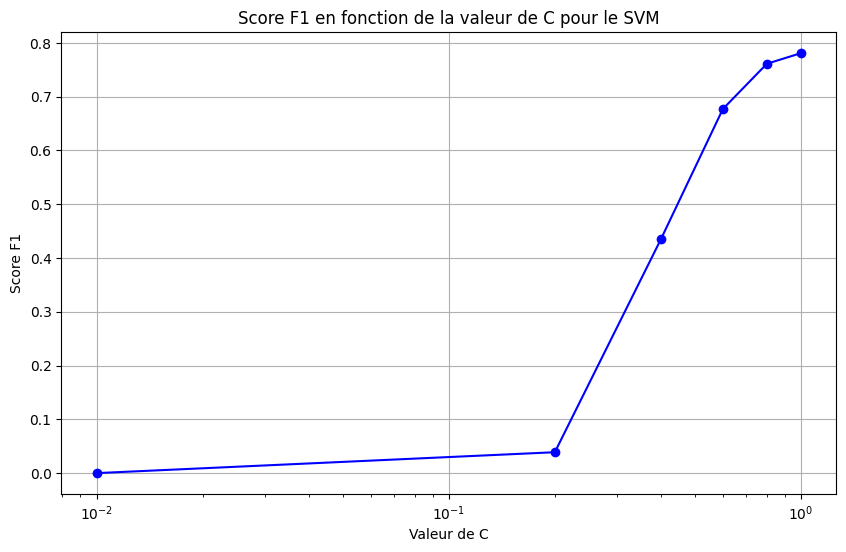

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(C_values, f1_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Valeur de C')
plt.ylabel('Score F1')
plt.title('Score F1 en fonction de la valeur de C pour le SVM')
plt.xscale('log')  
plt.grid(True)
plt.show()

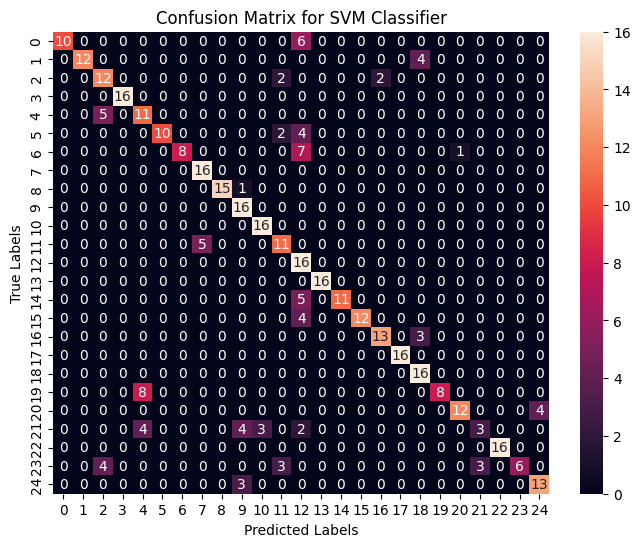

In [41]:
cm_svm = confusion_matrix(y_val, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM Classifier')
plt.show()


In [42]:
cv_tested = read_pdf("CV_test_dataengineer.pdf")
cv_tested_cleaned = clean_text(cv_tested)
cv_tested_vectorized = vectorizer.transform([cv_tested_cleaned])

# Prédiction de la catégorie
categorie_predite = model.predict(cv_tested_vectorized)
print("Catégorie prédite pour le CV externe :", categorie_predite[0])

Catégorie prédite pour le CV externe : 6


In [43]:
nlp = spacy.load("en_core_web_lg")
skill_pattern_path = "jz_skill_patterns.jsonl"
ruler = nlp.add_pipe("entity_ruler")
ruler.from_disk(skill_pattern_path)
nlp.pipe_names
def get_skills(text):
    doc = nlp(text)
    myset = []
    subset = []
    for ent in doc.ents:
        if ent.label_ == "SKILL":
            subset.append(ent.text)
    myset.append(subset)
    return subset


def unique_skills(x):
    return list(set(x))

In [44]:
data["skills"] = data["cleaned_text"].str.lower().apply(get_skills)
data["skills"] = data["skills"].apply(unique_skills)
sent = nlp(data["cleaned_text"].iloc[0])
displacy.render(sent, style="ent", jupyter=True)